In [1]:
%matplotlib inline 
from modules.nanoribon import*
from sympy.interactive.printing import init_printing
from functools import partial
import matplotlib.pyplot as pl
import numpy as np

init_printing()

class Plot(object):
    
    def __init__(self,points):
        self.xlist=map(lambda x: -float(1)+ float(2)*(x)/(points), range(points))
        self.eigenvals=[]
        
    def ylist(self,matrixV,matrixWcos,matrixWsin):
        
        self.eigenvals= map(lambda k: Experimento.eigenvals(k,matrixV,matrixWcos,matrixWsin), self.xlist)
        return self.eigenvals
    
    def plots(self,matrixV,matrixWcos,matrixWsin):
        
        ylist=self.ylist(matrixV,matrixWcos,matrixWsin)
        arrayX=np.asarray([self.xlist])
        np.savetxt("dados.dat",  np.concatenate((arrayX.T,ylist), axis=1), delimiter=" ",fmt='%1.4f')
        pl.figure()
        pl.rc('text', usetex=True)
#        pl.rc('font', family='serif')
        pl.ylabel("Energy",fontsize=18)
        pl.xlabel(r'\textit{ Wave Number}$\frac{k}{\pi}$',fontsize=18)
        pl.plot(self.xlist, ylist)
        pl.show()
        
    def plot(self,matrixV,matrixWcos,matrixWsin,*indices):
        pl.figure()

        for i,indice in enumerate(indices):
            eigen=[]
            for item_k in self.ylist(matrixV,matrixWcos,matrixWsin):
                item=item_k[indice]
                item=item/pi
                eigen = np.append(eigen,item)
            pl.rc('text', usetex=True)
#        pl.rc('font', family='serif')
            pl.ylabel("Energy",fontsize=18)
            pl.xlabel(r'\textit{ Wave Number}$\frac{k}{\pi}$',fontsize=18)
            pl.plot(self.xlist, eigen)
        pl.show()       


Ny=20
Experimento = Hamiltonian(Ny)
# valA,valB,valC,valD,valR_0,vala,valM

matrixV = Experimento.V(0.5,-1,0,0,0,1,-0.5)['numeric'];
matrixWcos = Experimento.Wcos(0.5,-1,0,0,0,1,-0.5)['numeric'];
matrixWsin = Experimento.Wsin(0.5,-1,0,0,0,1,-0.5)['numeric'];
Grafico=Plot(500)

#Grafico.plots(matrixV,matrixWcos,matrixWsin)

/home/devmessias/venvs/numpy/local/lib/python2.7/site-packages/numpy/core/numeric.py:474: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


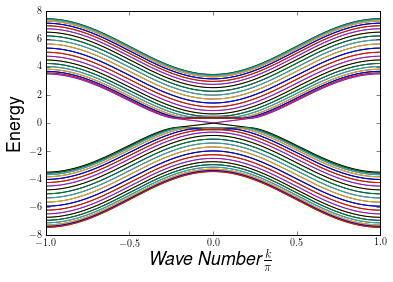

In [4]:
Grafico.plots(matrixV,matrixWcos,matrixWsin)